# Programming Exercise 6: Support Vector Machines
# 1 Support Vector Machines
## 1.1 Example Dataset 1

In [1]:
import scipy.io

data = scipy.io.loadmat('../matlab/ex6data1.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [2]:
X = data['X']
y = data['y']
print X.shape, y.shape

(51, 2) (51, 1)


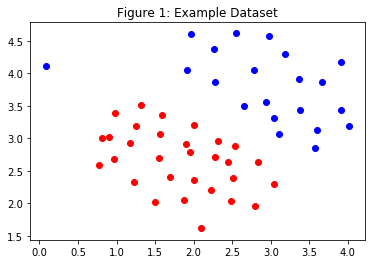

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

y = y[:, 0]
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.title('Figure 1: Example Dataset')

In [4]:
from sklearn.svm import SVC

clf1 = SVC(kernel='linear', C=1)
clf1.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
print clf1.coef_, clf1.intercept_

[[ 1.40718563  2.13398052]] [-10.34889778]


Decision boundary: coef\_[0, 0] \* x0 + coef\_[0, 1] \* x1 + intercept\_ = 0

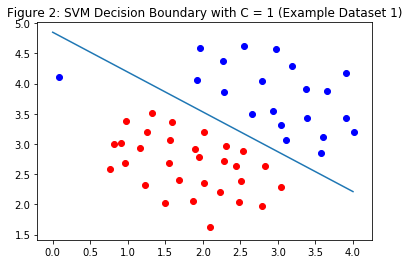

In [6]:
import numpy as np

xs = np.linspace(0, 4, 100)
ys = - (clf1.intercept_ + clf1.coef_[0, 0] * xs) / clf1.coef_[0, 1]
plt.plot(xs, ys)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.title('Figure 2: SVM Decision Boundary with C = 1 (Example Dataset 1)')

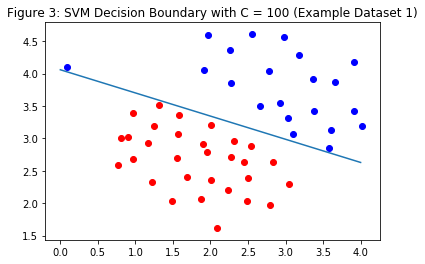

In [7]:
clf100 = SVC(kernel='linear', C=100)
clf100.fit(X, y)

xs = np.linspace(0, 4, 100)
ys = - (clf100.intercept_ + clf100.coef_[0, 0] * xs) / clf100.coef_[0, 1]
plt.plot(xs, ys)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.title('Figure 3: SVM Decision Boundary with C = 100 (Example Dataset 1)')

## 1.2 SVM with Gaussian Kernels
### 1.2.1 Gaussian Kernel
(Skipped)
### 1.2.2 Example Dataset 2

In [8]:
data = scipy.io.loadmat('../matlab/ex6data2.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [9]:
X = data['X']
y = data['y']
print X.shape, y.shape

(863, 2) (863, 1)


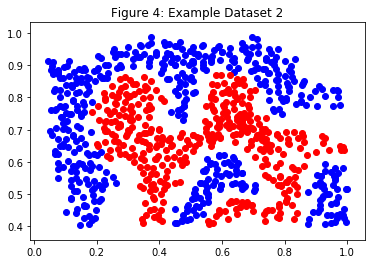

In [10]:
y = y[:, 0]
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.title('Figure 4: Example Dataset 2')

$K_{gauss}(x_i, x_j; \sigma) = \exp(-\frac{||x_i-x_j||^2}{2\sigma^2}) = \exp(-\gamma ||x_i-x_j||^2) = K_{rbf}(x_i, x_j; \gamma)$

In [11]:
sigma = 0.1
clf = SVC(kernel='rbf', C=1, gamma=0.5/sigma**2)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=50.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

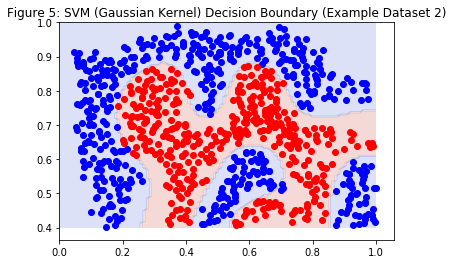

In [12]:
(xmin, xmax) = (0.0, 1.0)
(ymin, ymax) = (0.4, 1.0)
xs, ys = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
zs = clf.predict(np.c_[xs.ravel(), ys.ravel()])  # np.c_[] works like zip() numpy arrays
zs = zs.reshape(xs.shape)

plt.contourf(xs, ys, zs, cmap=plt.cm.coolwarm_r, alpha=0.2)  # _r for reverse colormap
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.title('Figure 5: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)')

### 1.2.3 Example Dataset 3

In [13]:
data = scipy.io.loadmat('../matlab/ex6data3.mat')
print data.keys()

['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']


In [14]:
X = data['X']
Xval = data['Xval']
y = data['y'][:, 0]
yval = data['yval'][:, 0]

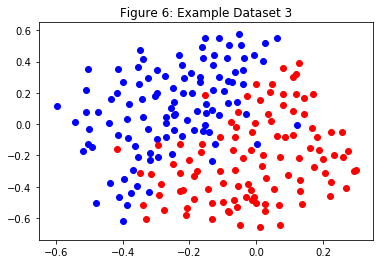

In [15]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.title('Figure 6: Example Dataset 3')

In [ ]:
values = (0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30)
best_accuracy = 0
best_C = None
best_sigma = None

for C in values:
    for sigma in values:
        ### YOUR CODE HERE ###





        ######################

print 'best validation accuracy = %.2f%% for C = %.2f and sigma = %.2f' % (
    best_accuracy * 100, best_C, best_sigma)

clf = SVC(kernel='rbf', C=best_C, gamma=0.5/best_sigma**2)
clf.fit(X, y)
print 'training accuracy = %.2f%%' % ((clf.predict(X) == y).mean() * 100)

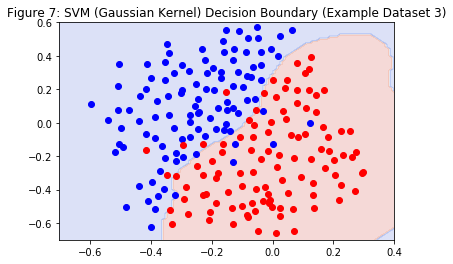

In [17]:
(xmin, xmax) = (-0.7, 0.4)
(ymin, ymax) = (-0.7, 0.6)
xs, ys = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
zs = clf.predict(np.c_[xs.ravel(), ys.ravel()])  # np.c_[] works like zip()
zs = zs.reshape(xs.shape)

plt.contourf(xs, ys, zs, cmap=plt.cm.coolwarm_r, alpha=0.2)  # _r for reverse colormap
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.title('Figure 7: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)')